In [3]:
import pandas as pd
kaur_eu=pd.read_csv("../final_figures/afr.inpeaks.kaur.tsv", sep="\t", header=0)


/users/anusri/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
import pandas as pd
import numpy as np
eus = pd.read_csv("../final_figures_new/Afr.CaQTLS.new.tsv", sep="\t", header=0)
eus = eus.rename({"beta": "beta_afr"},axis='columns')

datan = eus.merge(kaur_eu, left_on=["allele1", "allele2", "dbsnp_rsid"], right_on=["ref", "alt", "rsid"], how="inner").drop_duplicates()


(0.8036724482849446, 0.0)

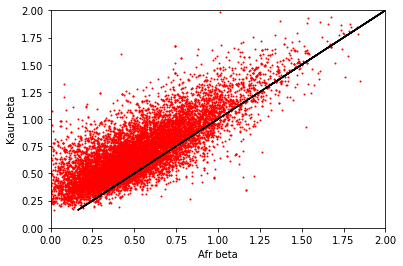

In [14]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


data1 = datan
data1["log10afpval"] = -1*np.log(data1["pval"])

data1["log10p"] = -1*np.log(data1["pvalue"])

th=5
plt.scatter(abs(data1[data1["log10p"]>th]["beta_afr"]), abs(data1[data1["log10p"]>th]["beta"]), s=1, c='r')

plt.xlabel("Afr beta")
plt.ylabel("Kaur beta")
plt.plot(abs(data1[data1["log10p"]>th]["beta"]), abs(data1[data1["log10p"]>th]["beta"]),  c='k')
plt.xlim((0,2))
plt.ylim((0,2))
pearsonr(abs(data1[data1["log10p"]>th]["beta"]),abs(data1[data1["log10p"]>th]["beta_afr"]))


(0.4222479536219453, 0.0)

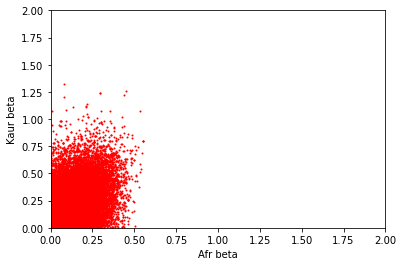

In [18]:
from scipy.stats import pearsonr
threshold=-1
plt.scatter(abs(data1[(data1["log10afpval"]>-1)&(data1["log10afpval"]<3)]["beta_afr"]), abs(data1[(data1["log10afpval"]>-1)&(data1["log10afpval"]<3)]["beta"]), s=1, c='r')


plt.xlabel("Afr beta")
plt.ylabel("Kaur beta")
#plt.plot(abs(data1[data1["Log10_BF"]<3]["beta"]), abs(data1[data1["Log10_BF"]<3]["beta"]),  c='k')
plt.xlim((0,2))
plt.ylim((0,2))
pearsonr(abs(data1[(data1["log10afpval"]>-1)&(data1["log10afpval"]<3)]["beta"]),abs(data1[(data1["log10afpval"]>-1)&(data1["log10afpval"]<3)]["beta_afr"]))

(0.7971568735906679, 0.0)

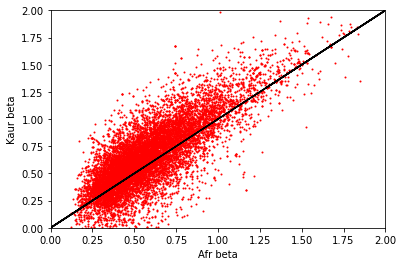

In [20]:
from scipy.stats import pearsonr
threshold=6
plt.scatter(abs(data1[data1["log10afpval"]>threshold]["beta_afr"]), abs(data1[data1["log10afpval"]>threshold]["beta"]), s=1, c='r')


plt.xlabel("Afr beta")
plt.ylabel("Kaur beta")
plt.plot(abs(data1[data1["log10afpval"]>threshold]["beta"]), abs(data1[data1["log10afpval"]>threshold]["beta"]),  c='k')
plt.xlim((0,2))
plt.ylim((0,2))
pearsonr(abs(data1[data1["log10afpval"]>threshold]["beta"]),abs(data1[data1["log10afpval"]>threshold]["beta_afr"]))


In [34]:
steps = np.arange(2, 70, 1)
x_values=[]
y_values=[]
for i in range(len(steps)):
    if pearsonr(abs(data1[(data1["log10afpval"]<steps[i]) ]["beta_afr"]), abs(data1[(data1["log10afpval"]<steps[i])]["beta"]))[1] < 1e-3:
        x_values.append(steps[i].astype(str))
        y_values.append(pearsonr(abs(data1[(data1["log10afpval"]<steps[i]) ]["beta_afr"]), abs(data1[(data1["log10afpval"]<steps[i]) ]["beta"]))[0])
    else:
        x_values.append(steps[i].astype(str)+":"+steps[i+1].astype(str))
        y_values.append(0)


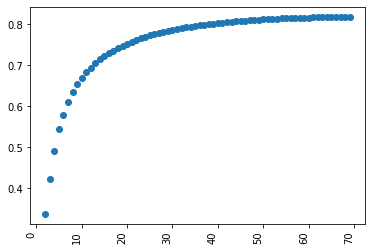

In [35]:
plt.scatter(steps,y_values)
plt.xticks(rotation=90, ha='right')
plt.show()


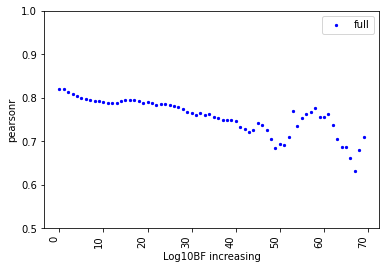

In [27]:
plt.scatter(steps,y_values,c="blue", s=5, label="full")
plt.ylim((0.5,1.0))
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.xlabel("Log10BF increasing")
plt.ylabel("pearsonr")
plt.show()

In [30]:
steps = np.arange(0, 60, 1)
x_values=[]
y_values=[]
for i in range(len(steps)):
    if pearsonr(abs(data1[(data1["log10p"]>steps[i]) ]["beta_afr"]), abs(data1[(data1["log10p"]>steps[i])]["beta"]))[1] < 1e-3:
        x_values.append(steps[i].astype(str))
        y_values.append(pearsonr(abs(data1[(data1["log10p"]>steps[i]) ]["beta_afr"]), abs(data1[(data1["log10p"]>steps[i]) ]["beta"]))[0])
    else:
        x_values.append(steps[i].astype(str))
        y_values.append(0)


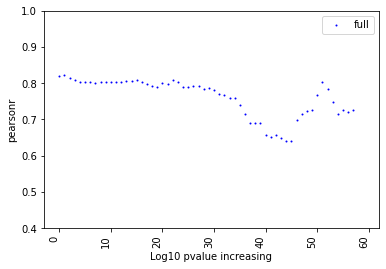

In [32]:
plt.scatter(steps,y_values,c="blue", s=1, label="full")
plt.ylim((0.4,1.0))
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.xlabel("Log10 pvalue increasing")
plt.ylabel("pearsonr")
plt.show()